Epoch 0, Loss: 1.9620449654514305
Epoch 100, Loss: 0.016487497279565073
Epoch 200, Loss: 0.013277445459600197
Epoch 300, Loss: 0.011772970912059796
Epoch 400, Loss: 0.010997483246483957
Epoch 500, Loss: 0.010570314113194266
Epoch 600, Loss: 0.010321855873957562
Epoch 700, Loss: 0.010170678168688328
Epoch 800, Loss: 0.010075241691063452
Epoch 900, Loss: 0.010013159764008479


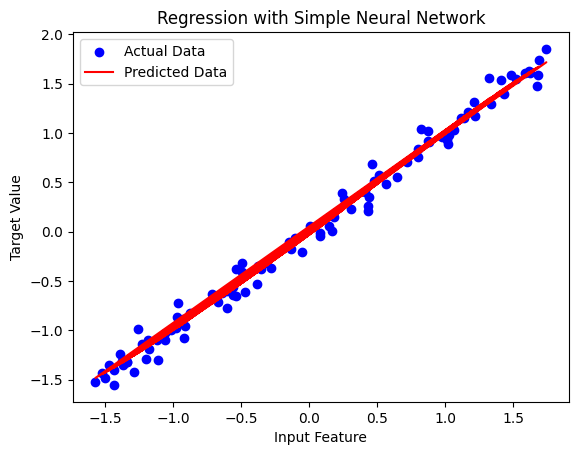

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def identity(x):
    return x

def identity_derivative(x):
    return np.ones_like(x)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = identity(self.final_input)
        return self.final_output

    def backward(self, X, y, output):
        # Backward pass (gradient descent)
        output_error = y - output
        output_delta = output_error * identity_derivative(output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        return self.forward(X)

# Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.1

# Normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean(axis=0)) / y.std(axis=0)

# Initialize the neural network
nn = SimpleNeuralNetwork(input_size=1, hidden_size=5, output_size=1, learning_rate=0.01)

# Train the neural network
nn.train(X, y, epochs=1000)

# Make predictions
predictions = nn.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Predicted Data')
plt.title('Regression with Simple Neural Network')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.show()
